# Implementation with Jupyter Notebooks

In [1]:
# Import necessary modules. 
# pandas for calculating the moving average, 
# matplotlib for the visualisation of the data
# seaborn for optimizing the plots

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data downloaded as csvs from the Udacity page as a pandas dataframe;
# Munich is my hometown and i wanted to compare to the avg temperature of cities 
# in other climate zones, thats why I choose New Orleans and Moscow.
# Query_Munich: Select * From city_data Where city = 'Munich';
# Query_Moscow: Select * From city_data Where city = 'Moscow';
# Query_NewOrleans: Select * From city_data Where city = 'New Orleans';
# Query_global: Select * From global_data

df_munich = pd.read_csv('results_munich.csv')
df_no = pd.read_csv('results_no.csv')
df_moscow = pd.read_csv('results_moscow.csv')
df_global = pd.read_csv('results_global.csv')

In [2]:
# harmonizing the range of the years of the datasets, the dataframes have the same number of rows 
# and start with the year 1758 and end with 2013.
# Fill NA Values with interpolation, because the New Orleans Data Set has a lot of them
df_munich = df_munich[15:271]
df_no_inter = df_no.interpolate()
df_moscow = df_moscow[15:271]
df_global = df_global[8:264]

In [8]:
df_munich.head()

,year,city,country,avg_temp
15,1758,Munich,Germany,3.83
16,1759,Munich,Germany,4.89
17,1760,Munich,Germany,5.02
18,1761,Munich,Germany,4.94
19,1762,Munich,Germany,4.49


In [9]:
df_munich.tail()

,year,city,country,avg_temp
266,2009,Munich,Germany,5.89
267,2010,Munich,Germany,4.85
268,2011,Munich,Germany,6.56
269,2012,Munich,Germany,5.88
270,2013,Munich,Germany,6.00




df_munich.describe()

In [3]:
# converting the avg_temp columns in pd Series

s_munich = df_munich['avg_temp']
s_no = df_no_inter['avg_temp']
s_moscow = df_moscow['avg_temp']
s_global = df_global['avg_temp']

# calculating the standard correlation coefficient
print('Munich dataset and others\n')
print('The Correlation between the average temperature of Munich and Moscow:', s_munich.corr(s_moscow))
print('The Correlation between the average temperature of Munich and New Orleans:', s_munich.corr(s_no))
print('The Correlation between the average temperature of Munich and the global average:', s_munich.corr(s_global))
print('\nMoscow dataset and others\n')
print('The Correlation between the average temperature of Moscow and New Orleans:', s_moscow.corr(s_no))
print('The Correlation between the average temperature of Moscow and the global average:', s_moscow.corr(s_global))
print('\nNew Orleans dataset and global\n')
print('The Correlation between the average temperature of New Orleans Global:', s_no.corr(s_global))

Munich dataset and others

The Correlation between the average temperature of Munich and Moscow: 0.5759752632787498
The Correlation between the average temperature of Munich and New Orleans: 0.24488558880001315
The Correlation between the average temperature of Munich and the global average: 0.36023517386163845

Moscow dataset and others

The Correlation between the average temperature of Moscow and New Orleans: 0.093022546761229
The Correlation between the average temperature of Moscow and the global average: 0.36294906044122505

New Orleans dataset and global

The Correlation between the average temperature of New Orleans Global: 0.322977898749365


Summary:
- All correlation coefficients are positive, 
- Moscow and munich have the highest correlation coefficient 0.58
- Moscow and New Orleans have the lowest correlation coefficient 0.09
- The correlation coefficient of the global data and the city data is between 0.32 and 0.36

In [4]:
# calculate the moving average with a window of seven years and adjusting the timescale

s_munich_MA7d = s_munich.rolling(window=7).mean()
s_no_MA7d = s_no.rolling(window=7).mean()
s_moscow_MA7d = s_moscow.rolling(window=7).mean()
s_global_MA7d = s_global.rolling(window=7).mean()
s_year = df_munich['year'][6:]

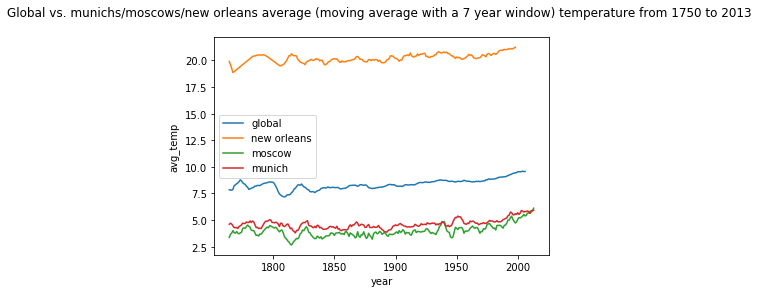

In [5]:
# plot all lines in one diagram

plt.title("Global vs. munichs/moscows/new orleans average (moving average with a 7 year window) temperature from 1750 to 2013 \n")

sns.lineplot(s_year, s_global_MA7d, label = 'global')
sns.lineplot(s_year, s_no_MA7d, label = 'new orleans')
sns.lineplot(s_year, s_moscow_MA7d, label = 'moscow')
sns.lineplot(s_year, s_munich_MA7d, label = 'munich')

plt.show()

# (Four) Observations about similarities/differences in the data trends

Udacity Questions
    - Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    - “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    - What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?


- Munichs/Moscows average temparature is lower than the global average, New Orleans temperature is higher
- All curves are rising. Some of the curves seem to rise faster, Moscows average temperature seems to increase faster than Munichs in recent years as the lines are crossing.
- The width of the range of the global avg_temp (1.49) is not so big as munichs (1.76) f.e., the increase of the temperature is higher in munich, than the global increase of temperature. This should be the case for all local temperature averages.
- The peaks and lows are similar, but have a different intensity, f.e. volcanic erruptions 1809/1815 (Source) may have caused the climate change => sudden decrease of temperature with different local/global impacts. The impact in moscow was greater and  and a little bit earlier than in munich.
- Munichs and moscows lines cross, the 7 year moving average of moscow became higher than munichs in recent years. This also happend between 1900 and 1950. If you look at the raw data munichs and moscows line of yearly temperature average cross more often.
- What can I say about the correlations? They are all positive, Munich and Moscow have the highest correlation.
- What can I say about the standard deviation? The highest standard deviation has New Orleans. Making use of the moving average instead of the raw data decreases the standard deviation.

In [6]:
df_no.head(70)

,year,city,country,avg_temp
0,1758,New Orleans,United States,20.87
1,1759,New Orleans,United States,19.73
2,1760,New Orleans,United States,9.24
3,1761,New Orleans,United States,NaN
4,1762,New Orleans,United States,NaN
5,1763,New Orleans,United States,NaN
6,1764,New Orleans,United States,NaN
7,1765,New Orleans,United States,NaN
8,1766,New Orleans,United States,NaN
9,1767,New Orleans,United States,NaN


In [7]:
df_no_inter.head(70)

,year,city,country,avg_temp
0,1758,New Orleans,United States,20.870000
1,1759,New Orleans,United States,19.730000
2,1760,New Orleans,United States,9.240000
3,1761,New Orleans,United States,10.518750
4,1762,New Orleans,United States,11.797500
5,1763,New Orleans,United States,13.076250
6,1764,New Orleans,United States,14.355000
7,1765,New Orleans,United States,15.633750
8,1766,New Orleans,United States,16.912500
9,1767,New Orleans,United States,18.191250
